# Predicción de Exitus (fallecimiento) con SVM

In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 


from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
import timeit

## Dataset

Leamos el dataset a utilizar.

In [2]:
# Load the dataset 
X = pd.read_csv("../datasets/dat_sanidad.csv", sep=';', decimal=',', encoding='latin-1')
X.shape

(32706, 10)

El dataset consta de:

- 32706 **filas** o instancias
- 10 **columnas** o variables.

Veamos su contenido.

In [3]:
X.head()

,gravedad,pct_mortalidad_norma,edad_dias,numproc,potencial_ambul,proc,estancia_esperada,tipgrd,tiping,exitus
0,4,0.408730,12596,21,0,1,151,Q,1,0
1,4,0.306931,20973,22,0,1,99,Q,1,0
2,4,0.278481,19611,19,0,1,87,Q,1,0
3,3,0.150289,13583,22,0,1,100,Q,1,0
4,1,0.016573,18042,2,0,1,44,Q,1,0


- **gravedad**: Gravedad dentro del GRD. Valores de 1 a 4.

- **pct_mortalidad_norma**: Tasa de mortalidad histórica para ese GRD.
        
- **edad_dias**: Edad en días del paciente.

- **numproc**: Número de procedimientos que se han llevado a cabo al paciente a las 24 horas.
    
- **potencial_ambul**: Flag (valor 0 = no / 1 = sí) que indica si el caso se ha catalogado como potencialmente ambulatorio, es decir, no requiere ingreso.
    
- **proc**: Procedencia del paciente.

- **estancia_esperada**: Número de días que se espera que el paciente esté ingresado en el hospital por este episodio asistencial.

- **tipgrd**: GRD médico (M) o de quirófano (Q).
    
- **tiping**: Tipo de ingreso: Programado, urgente...
    
- **exitus**: 1 = El paciente falleció.

De estas variables, exitus es el target y las 9 variables restantes serán el input de nuestro modelo.

Veamos cuántos casos de exitus tenemos en porcentaje.

In [48]:
100 * np.sum(X['exitus'] == 1) / X.shape[0]

3.8402739558490797

Estamos por tanto, en un caso de problema de clasificación binario con cierto desbalanceo (menos 1s que 0s)

## One-Hot Encoding

Los modelos de logistic regression no admiten variables categóricas, por lo que tendremos que transformarlas a variables numéricas. Para ello utilizaremos la técnica de one-hot encoding.

<img src="../figures/oh.png" width="50%">

Seleccionemos las variables categóricas en primer lugar.

Realizamos one hot encoding de las variables categoricas

### Tipificar

Ahora vamos a tipificar los datos, es decir, llevarlos a media 0 y desviación estándar 1.

<img src="../figures/tipify.png" width="50%">

    (x0_M,)   (x0_Q,)     index     proc  potencial_ambul  estancia_esperada  \
0 -1.554964  1.554964 -1.731998 -0.38792        -0.258527          19.632898   
1 -1.554964  1.554964 -1.731892 -0.38792        -0.258527          12.641211   
2 -1.554964  1.554964 -1.731786 -0.38792        -0.258527          11.027745   
3 -1.554964  1.554964 -1.731680 -0.38792        -0.258527          12.775667   
4 -1.554964  1.554964 -1.731574 -0.38792        -0.258527           5.246158   

   pct_mortalidad_norma    tiping   numproc  edad_dias  gravedad  
0              5.678791 -0.571999  6.002393  -0.713484  2.553799  
1              4.151382 -0.571999  6.357038   0.186170  2.553799  
2              3.724521 -0.571999  5.293102   0.039897  2.553799  
3              1.801116 -0.571999  6.357038  -0.607484  1.479058  
4             -0.205167 -0.571999 -0.735868  -0.128607 -0.670423  


## Split en Train/Validación/Test

Utilizaremos a modo de ejemplo los ratios habitualmente recomendados:

• Train: 70%.

• Validación: 15%.

• Test: 15%.


In [58]:
perc_values = [];

Creamos los conjuntos de train, validacion y test con el tamaño seleccionado pero respetando el eje temporal. 

Es importante indicar aquí que los datos proporcionados ya vienen **ordenados por fecho ingreso**. Si no fuera así, sería necesario realizar este ordenamiento primero para respetar el eje temporal en la división en train, validación y test.

Visualizamos el tamaño de los 3 subdatasets

In [60]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Validation data size = ' + str(X_val.shape))
print('Validation target size = ' + str(y_val.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (22894, 11)
Train target size = (22894,)
Validation data size = (4905, 11)
Validation target size = (4905,)
Test data size = (4907, 11)
Test target size = (4907,)



## SVM

Vamos a aplicar ahora un modelo de logistic regression para intentar predecir la probabilidad de exitus en función de todas las otras variables de las que disponemos en el dataset. Recordemos que la definición de logistic regression para un problema binario es la siguiente:

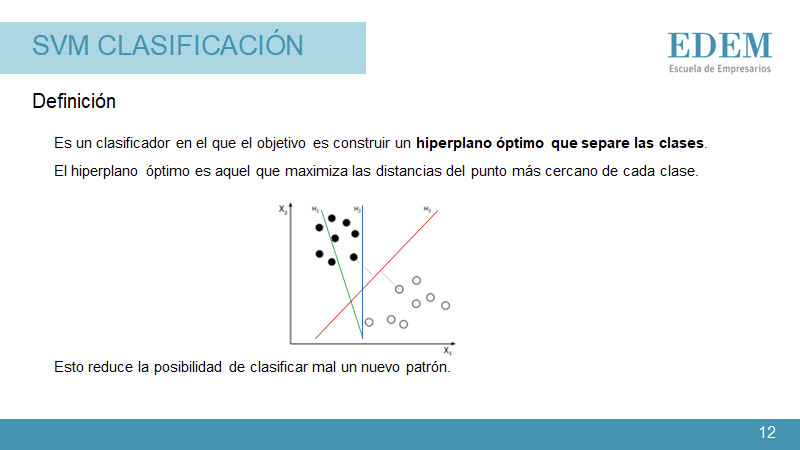


1) Importar modelo.

En este caso SVC


In [157]:
from sklearn.linear_model import 

Veamos su documentación.

In [158]:
help()

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

2) Importar métrica.

Veamos que sucedería si usáramos AUC como métrica.

In [159]:
from sklearn.metrics import 

3) Definir el método.

Utilizaremos el modelo con kernel rbf (kernel gaussiano).

In [163]:
model = 

4) Llamar al método fit para entrenar el modelo

LogisticRegression(penalty='l1', solver='liblinear')

5) Generamos las predicciones. Decide si debes obtener etiquetas o probabilidades.

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [172]:
# Calcular métricas de evaluación


In [173]:
results

,model,auc_train,auc_val,auc_test
0,Lasso,0.938676,0.936831,0.928129


# Grid Search


Vamos a proceder a calcular los parámetros óptimos para nuestro modelo. En nuestro caso queremos optimizar el hiperparámetro C y gamma.

Nos quedamos con el mejor resultado.

In [42]:
best = 
best

0.1

Entrenamos el modelo final, **tras concatenar train y validación**.

In [43]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Validation data size = ' + str(X_val.shape))
print('Validation target size = ' + str(y_val.shape))

# Combinar train y validación
X_train =
y_train = 

del X_val, y_val

print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))

Train data size = (22894, 11)
Train target size = (22894,)
Validation data size = (4905, 11)
Validation target size = (4905,)
Train data size = (27799, 11)
Train target size = (27799,)


Y finalmente entrenamos el modelo con los mejores hiperparámetros.

,model,auc_train,auc_val,auc_test
0,Lasso,0.938676,0.936831,0.928128
1,Ridge,0.938631,0.936795,0.928026
2,Optimized Lasso,0.938540,None,0.928864


In [ ]:
results

El mejor modelo entre todos los probados es...

In [45]:
results['model'][results['auc_test'].idxmax()]

'Optimized Lasso'